In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read data

In [2]:
df = pd.read_csv("./output/all-data.csv")

### Get concise summary of the dataframe 

In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns")

There are 186850 rows and 6 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Data Cleaning

### First: Column labels

In [6]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

##### We notice two problems with column labels:
1. They are long.
2. There is a space in some labels.

#### Rename

In [7]:
df.rename(columns={"Quantity Ordered":"Quantity",
                   "Price Each":"unit price","Order Date":"Date",
                   "Purchase Address":"Address"},inplace=True)

#### Capitalize

In [8]:
df.rename(str.title, axis='columns',inplace=True)

#### Remove spaces 

In [9]:
df.columns=df.columns.str.replace(" ","")

##### Let's look at them now

In [10]:
df.columns

Index(['OrderId', 'Product', 'Quantity', 'UnitPrice', 'Date', 'Address'], dtype='object')

### Second: Cast data types

#### Convert ```"OrderId","Quantity","Price"``` columns to numeric values

In [11]:
df[["OrderId","Quantity","UnitPrice"]]=df[["OrderId","Quantity","UnitPrice"]].apply(pd.to_numeric,errors="coerce",downcast ='integer')

#### Convert ```"Date"``` column to datetime object

In [12]:
df["Date"] = pd.to_datetime(df["Date"],format = "%d/%m/%y %H:%M",errors="coerce")

#### Drop NaN values

In [13]:
df.dropna(inplace=True)

#### Convert ```"OrderId","Quantity"``` columns to integer
The data type of these columns is **float** because there were **NaN values** at them, but after dropping them in the last step, we can now convert the columns into **integer**.

In [14]:
df[["OrderId","Quantity"]].dtypes

OrderId     float64
Quantity    float64
dtype: object

In [15]:
convert_dict = {'OrderId': int,
                'Quantity': int
               }
  
df = df.astype(convert_dict)

### Third: Set the ```"Date"``` column as index

In [16]:
df.set_index("Date",inplace=True)
df.sort_index(inplace=True) #sort rows by their date

In [17]:
df.head()

,OrderId,Product,Quantity,UnitPrice,Address
Date,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301"


### Fourth: Add new columns

#### Add ```"Month"``` column

In [18]:
df["Month"]=df.index.month_name()

#### Add ```"DayOrder"``` column

In [19]:
df["DayOrder"]=df.index.day

#### Add ```"DayName"``` column

In [20]:
df["DayName"]=df.index.day_name()

#### Add ```"TotalCost"``` column 

In [21]:
df["TotalCost"] = df["Quantity"] * df["UnitPrice"]

#### Add ```"City"``` column

In [22]:
df["Address"].head(3)

Date
2019-01-01 03:07:00        9 Lake St, New York City, NY 10001
2019-01-01 03:40:00    760 Church St, San Francisco, CA 94016
2019-01-01 04:56:00       735 5th St, New York City, NY 10001
Name: Address, dtype: object

##### 1. Split the address column

In [23]:
splited_address = df["Address"].str.split(", ",expand=True)
splited_address.head(3)

,0,1,2
Date,,,
2019-01-01 03:07:00,9 Lake St,New York City,NY 10001
2019-01-01 03:40:00,760 Church St,San Francisco,CA 94016
2019-01-01 04:56:00,735 5th St,New York City,NY 10001


##### 2. Split the  (state and postal code) column

In [24]:
splited_state_postalcode = splited_address[2].str.split(expand=True)
splited_state_postalcode.head(3)

,0,1
Date,,
2019-01-01 03:07:00,NY,10001
2019-01-01 03:40:00,CA,94016
2019-01-01 04:56:00,NY,10001


##### 3. Merge states and cities in one column

In [25]:
cities = splited_address[1]
states = splited_state_postalcode[0]

merged_city_state = cities.str.cat(states,sep=", ")
merged_city_state.head(3)

Date
2019-01-01 03:07:00    New York City, NY
2019-01-01 03:40:00    San Francisco, CA
2019-01-01 04:56:00    New York City, NY
Name: 1, dtype: object

##### 4. Add the ```"City"``` column

In [26]:
df["City"] = merged_city_state

<hr>

In [27]:
print(f"After cleaning the data up,There are {df.shape[0]} rows and {df.shape[1]} columns")

After cleaning the data up,There are 72871 rows and 10 columns


In [28]:
df.head()

,OrderId,Product,Quantity,UnitPrice,Address,Month,DayOrder,DayName,TotalCost,City
Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,1,Tuesday,11.99,"New York City, NY"
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,1,Tuesday,11.95,"San Francisco, CA"
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,1,Tuesday,150.00,"New York City, NY"
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,1,Tuesday,2.99,"Dallas, TX"
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,1,Tuesday,23.90,"Atlanta, GA"


 ## Exploring the data

#### Change the style of the figure to the "dark" theme

In [29]:
sns.set_style("whitegrid")

### Q #1: Which months acheived higher product sales and which acheived higher profit?

#### Step #1: Group data by ```"Month"``` column

In [30]:
month_group=df.loc["2019"].groupby("Month" ,sort = False)

#### Step #2: Get the monthly product sales

In [31]:
monthly_product_sales= month_group["Quantity"].sum()
monthly_product_sales.head()

Month
January     6826
February    6962
March       6534
April       6813
May         6816
Name: Quantity, dtype: int32

#### Step #3: Get the monthly profit

In [32]:
monthly_profit= month_group["TotalCost"].sum()
monthly_profit.head()

Month
January     1157648.96
February    1137457.04
March       1074432.90
April       1163857.72
May         1135284.73
Name: TotalCost, dtype: float64

#### Step #4: Data visualization

Text(0.5, 1.0, 'Monthly product sales')

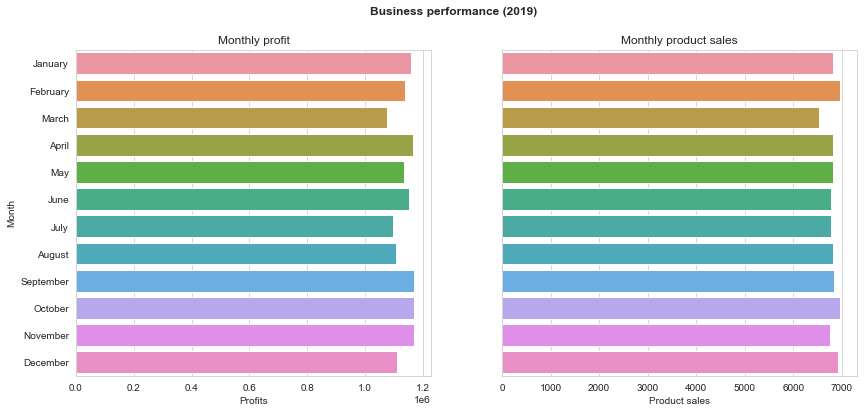

In [33]:
# Create subplot
fig,axes=plt.subplots(1,2,figsize=(14,6),sharey=True)
fig.suptitle("Business performance (2019)",fontweight="bold")

# months names list
months = df["Month"].unique()

#The monthly profit plot
sns.barplot(x=monthly_profit, y=months,ax=axes[0])
axes[0].set_xlabel("Profits") #x label
axes[0].set_ylabel("Month") #y label
axes[0].set_title("Monthly profit") #title

#The monthly product sales plot
sns.barplot(x=monthly_product_sales, y=months,ax=axes[1])
axes[1].set_xlabel("Product sales") #x label
axes[1].set_title("Monthly product sales")#title


#### Results:
1. **October and February** acheived the highest product sales
2. **September, October, November and April** acheived the highest profits 

### Q #2: Which products were highly sold each month?

#### Step #1: Group the data by ```"Month"``` and ```"Product"``` columns 

In [37]:
month_product_group = df.groupby(["Month","Product"],sort=False)
month_product_group.first().head()

OrderId  Quantity  UnitPrice  \
Month   Product                                                  
January Wired Headphones           147268         1      11.99   
        USB-C Charging Cable       148041         1      11.95   
        Apple Airpods Headphones   149343         1     150.00   
        AAA Batteries (4-pack)     149964         1       2.99   
        iPhone                     141732         1     700.00   

                                                                 Address  \
Month   Product                                                            
January Wired Headphones              9 Lake St, New York City, NY 10001   
        USB-C Charging Cable      760 Church St, San Francisco, CA 94016   
        Apple Airpods Headphones     735 5th St, New York City, NY 10001   
        AAA Batteries (4-pack)           75 Jackson St, Dallas, TX 75001   
        iPhone                            446 Pine St, Atlanta, GA 30301   

                                  DayOrder  DayName  TotalCost  \
Month   Product                                                  
January Wired Headphones                 1  Tuesday      11.99   
        USB-C Charging Cable             1  Tuesday      11.95   
        Apple Airpods Headphones         1  Tuesday     150.00   
        AAA Batteries (4-pack)           1  Tuesday       2.99   
        iPhone                           1  Tuesday     700.00   

                                               City  
Month   Product                                      
January Wired Headphones          New York City, NY  
        USB-C Charging Cable      San Francisco, CA  
        Apple Airpods Headphones  New York City, NY  
        AAA Batteries (4-pack)           Dallas, TX  
        iPhone                          Atlanta, GA

#### Step #2: Get the count of sold items for each product during every month

In [43]:
sold_items_count = month_product_group["Quantity"].sum()
sold_items_count.head()

Month    Product                 
January  Wired Headphones             677
         USB-C Charging Cable         850
         Apple Airpods Headphones     486
         AAA Batteries (4-pack)      1003
         iPhone                       241
Name: Quantity, dtype: int32

#### Step #3: Create new data frame

In [39]:
month_product_df= pd.DataFrame(index=df["Month"].unique(),columns=df["Product"].unique())
month_product_df.head()

,Wired Headphones,USB-C Charging Cable,Apple Airpods Headphones,AAA Batteries (4-pack),iPhone,Lightning Charging Cable,34in Ultrawide Monitor,AA Batteries (4-pack),Google Phone,Macbook Pro Laptop,ThinkPad Laptop,27in FHD Monitor,Bose SoundSport Headphones,Flatscreen TV,27in 4K Gaming Monitor,LG Dryer,20in Monitor,LG Washing Machine,Vareebadd Phone
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step #4: Assign the value of each cell in the new data frame

In [48]:
for month in month_product_df.index : #iterate over each month
    for product in month_product_df.columns: #iterate over each month
        month_product_df.loc[month,product] = sold_items_count.loc[month, product] #assign the cell value

In [50]:
month_product_df=month_product_df.apply(pd.to_numeric) #convert the data frame to numeric values

In [49]:
month_product_df.head()

,Wired Headphones,USB-C Charging Cable,Apple Airpods Headphones,AAA Batteries (4-pack),iPhone,Lightning Charging Cable,34in Ultrawide Monitor,AA Batteries (4-pack),Google Phone,Macbook Pro Laptop,ThinkPad Laptop,27in FHD Monitor,Bose SoundSport Headphones,Flatscreen TV,27in 4K Gaming Monitor,LG Dryer,20in Monitor,LG Washing Machine,Vareebadd Phone
January,677,850,486,1003,241,734,202,874,190,163,151,252,441,153,199,19,146,15,71
February,715,766,548,1014,233,775,195,939,202,142,137,222,428,173,207,27,149,26,64
March,663,762,519,909,213,753,196,827,175,140,137,250,427,141,190,15,131,22,64
April,668,729,534,979,239,744,198,909,201,155,135,259,428,153,210,24,142,30,76
May,692,711,467,1093,216,770,178,866,191,174,122,251,466,169,224,12,140,23,51


#### Step #5: Visualize the data

<AxesSubplot:>

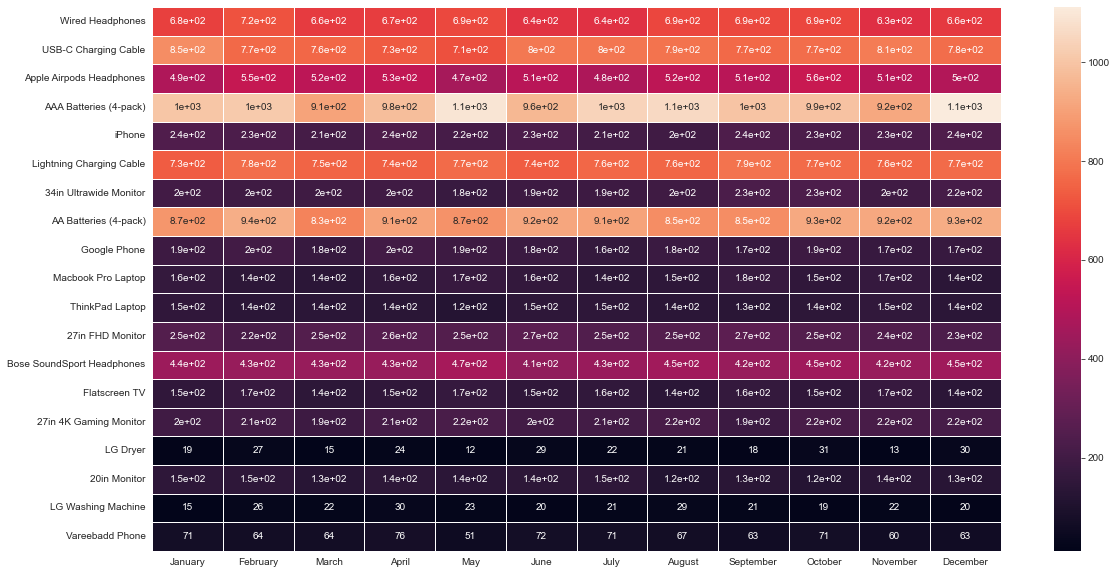

In [53]:
fig,ax = plt.subplots(figsize=(19,10))
sns.heatmap(data=month_product_df.transpose(),ax=ax,linewidths=1,annot=True)

#### Results:
1. **AAA Batteries (4-pack) and AA Batteries (4-pack)** were the highest sold products each month.
2. **LG Dryer, LG Washing Machine and Vareebadd Phone** were the least sold products.
